In [16]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
Data_df = pd.merge(city_data, ride_data, on="city")

# Display the data table for preview
Data_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

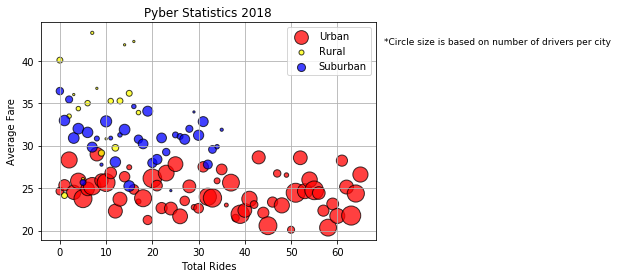

In [17]:
# Obtain the x and y coordinates for each of the three city types

urbanCities = Data_df.loc[Data_df["type"] == "Urban",:]
urbanCities_mean = urbanCities.groupby(["city"]).mean()

x_urban = urbanCities["city"].value_counts()
y_urban = urbanCities_mean["fare"]
z_urban = urbanCities_mean["driver_count"]
x_urban_axis = np.arange(0, len(x_urban), 1)

ruralCities = Data_df.loc[Data_df["type"] == "Rural",:]
ruralCities_mean = ruralCities.groupby(["city"]).mean()

x_rural = ruralCities["city"].value_counts()
y_rural = ruralCities_mean["fare"]
z_rural = ruralCities_mean["driver_count"]
x_rural_axis = np.arange(0, len(x_rural), 1)

suburbanCities = Data_df.loc[Data_df["type"] == "Suburban",:]
suburbanCities_mean = suburbanCities.groupby(["city"]).mean()

x_suburban = suburbanCities["city"].value_counts()
y_suburban = suburbanCities_mean["fare"]
z_suburban = suburbanCities_mean["driver_count"]
x_suburban_axis = np.arange(0, len(x_suburban), 1)

# Build the scatter plots for each city types
urbanScatter = plt.scatter(x_urban_axis, y_urban, s=z_urban*5,
            marker="o", facecolors="red", edgecolors="black", alpha=0.75)
ruralScatter = plt.scatter(x_rural_axis, y_rural, s=z_rural*5,
            marker="o", facecolors="yellow", edgeColors="black", alpha=0.75)
suburbanScatter = plt.scatter(x_suburban_axis, y_suburban, s=z_suburban*5,
            marker="o", faceColors="blue", edgeColors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("Pyber Statistics 2018")
plt.xlabel("Total Rides")
plt.ylabel("Average Fare")
plt.grid()

# Create a legend
plt.legend((urbanScatter, ruralScatter, suburbanScatter), ('Urban', 'Rural', 'Suburban'))

# Incorporate a text label regarding circle size
plt.text(70, 42, "*Circle size is based on number of drivers per city", fontsize=9)

# Save Figure
plt.savefig("pyberGraph.png")

## Total Fares by City Type

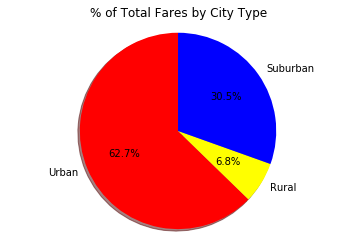

In [18]:
# Calculate Type Percents
urbanFare = Data_df.loc[Data_df["type"] == "Urban","fare"].sum()
ruralFare = Data_df.loc[Data_df["type"] == "Rural","fare"].sum()
suburbanFare = Data_df.loc[Data_df["type"] == "Suburban","fare"].sum()

cityType = ["Urban", "Rural", "Suburban"]
totalFare = [urbanFare, ruralFare, suburbanFare]
colors = ["red", "yellow", "blue"]



# Build Pie Chart
plt.pie(totalFare, labels=cityType, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)

plt.title("% of Total Fares by City Type")
plt.axis("equal")


# Save Figure
plt.savefig("totalFares.png")

## Total Rides by City Type

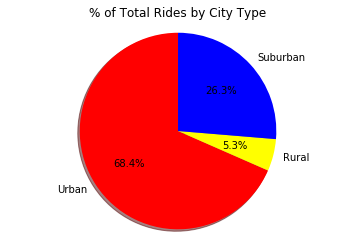

In [19]:
# Calculate Ride Percents
urbanRides = Data_df.loc[Data_df["type"] == "Urban","ride_id"].count()
ruralRides = Data_df.loc[Data_df["type"] == "Rural","ride_id"].count()
suburbanRides = Data_df.loc[Data_df["type"] == "Suburban","ride_id"].count()

cityType = ["Urban", "Rural", "Suburban"]
rideCount = [urbanridecount, ruralridecount, suburbanridecount]
colors = ["red", "yellow", "blue"]


# Build Pie Chart
plt.pie(rideCount, labels=cityType, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)

plt.title("% of Total Rides by City Type")
plt.axis("equal")


# Save Figure
plt.savefig("totalRides.png")

## Total Drivers by City Type

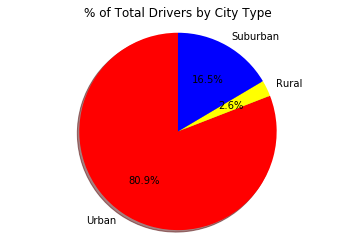

In [20]:
# Calculate Driver Percents
urbantotaldrivers = city_data.loc[city_data["type"] == "Urban","driver_count"].sum()
ruraltotaldrivers = city_data.loc[city_data["type"] == "Rural","driver_count"].sum()
suburbantotaldrivers = city_data.loc[city_data["type"] == "Suburban","driver_count"].sum()

cityType = ["Urban", "Rural", "Suburban"]
totalDrivers = [urbantotaldrivers, ruraltotaldrivers, suburbantotaldrivers]
colors = ["red", "yellow", "blue"]

# Build Pie Charts
plt.pie(totalDrivers, labels=cityType, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)

plt.title("% of Total Drivers by City Type")
plt.axis("equal")

# Save Figure
plt.savefig("totaldrivers_pieplot.png")